In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

path="/its/home/drs25/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
datapath="/its/home/drs25/Documents/data/Tactile Dataset/datasets/"
if os.name == 'nt':
    path="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
    datapath="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/texture-tactip/"

## load data set

In [51]:
data = np.load(datapath+"X_data_presstip.npz") #load data
X=None
for array_name in data:
    X=data[array_name]
X=(X* 3.3) / 65536 #convert to voltage
data = np.load(datapath+"y_data_presstip.npz") #load data
y=None
for array_name in data:
    y=data[array_name]
print(X.shape,y.shape)

(600, 20, 16) (600,)


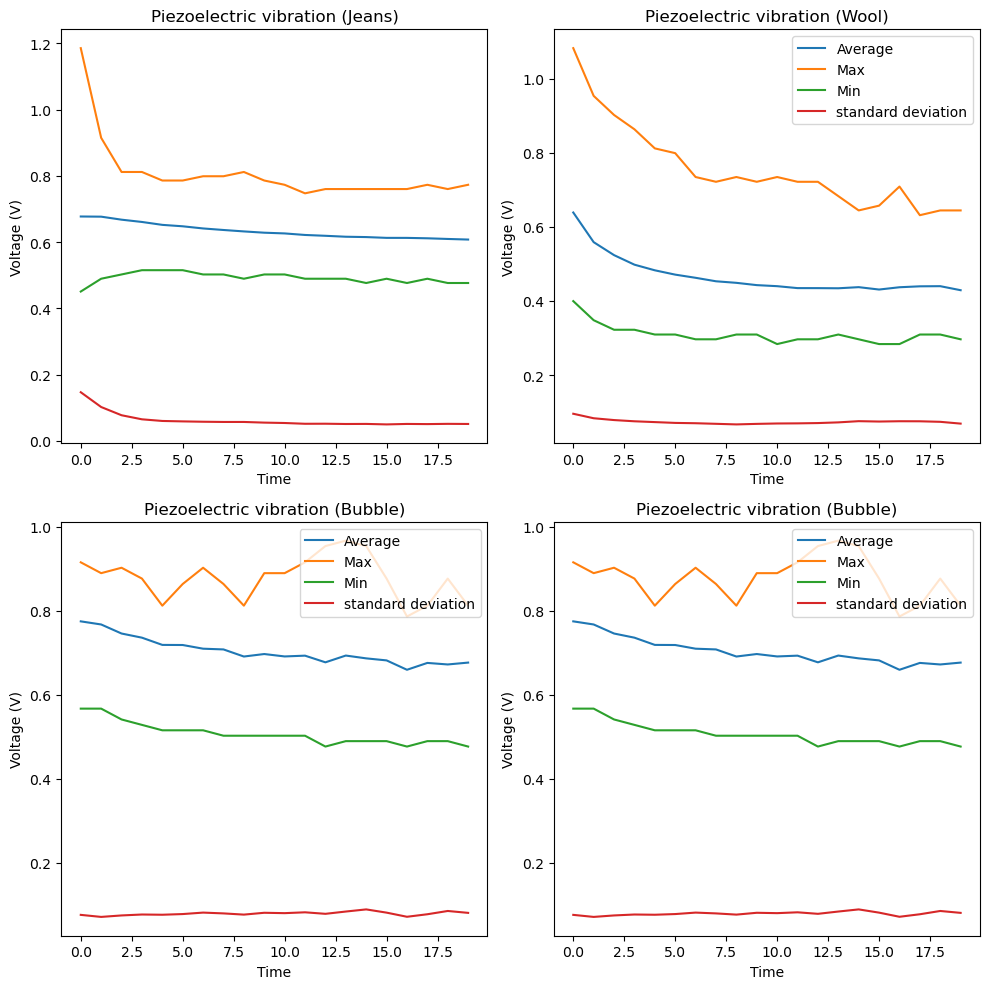

In [53]:
jeans=X[np.where(y==1)]
wool=X[np.where(y==2)]
bubble=X[np.where(y==0)]

std=np.std(jeans,axis=0)
av=np.average(jeans,axis=0)
ma=np.max(jeans,axis=0)
mi=np.min(jeans,axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].plot(av[:,8])
axes[0].plot(ma[:,8])
axes[0].plot(mi[:,8])
axes[0].plot(std[:,8])
axes[0].set_ylabel("Voltage (V)")
axes[0].set_xlabel("Time")
axes[0].set_title("Piezoelectric vibration (Jeans)")

std=np.std(wool,axis=0)
av=np.average(wool,axis=0)
ma=np.max(wool,axis=0)
mi=np.min(wool,axis=0)

axes[1].plot(av[:,8],label="Average")
axes[1].plot(ma[:,8],label="Max")
axes[1].plot(mi[:,8],label="Min")
axes[1].plot(std[:,8],label="standard deviation")
axes[1].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time")
axes[1].set_title("Piezoelectric vibration (Wool)")
axes[1].legend(loc="upper right")

std=np.std(bubble,axis=0)
av=np.average(bubble,axis=0)
ma=np.max(bubble,axis=0)
mi=np.min(bubble,axis=0)

axes[2].plot(av[:,8],label="Average")
axes[2].plot(ma[:,8],label="Max")
axes[2].plot(mi[:,8],label="Min")
axes[2].plot(std[:,8],label="standard deviation")
axes[2].set_ylabel("Voltage (V)")
axes[2].set_xlabel("Time")
axes[2].set_title("Piezoelectric vibration (Bubble)")
axes[2].legend(loc="upper right")

std=np.std(bubble,axis=0)
av=np.average(bubble,axis=0)
ma=np.max(bubble,axis=0)
mi=np.min(bubble,axis=0)

axes[3].plot(av[:,8],label="Average")
axes[3].plot(ma[:,8],label="Max")
axes[3].plot(mi[:,8],label="Min")
axes[3].plot(std[:,8],label="standard deviation")
axes[3].set_ylabel("Voltage (V)")
axes[3].set_xlabel("Time")
axes[3].set_title("Piezoelectric vibration (Bubble)")
axes[3].legend(loc="upper right")

plt.tight_layout()
plt.savefig(path+"/images/piezoExample.pdf")
plt.show()



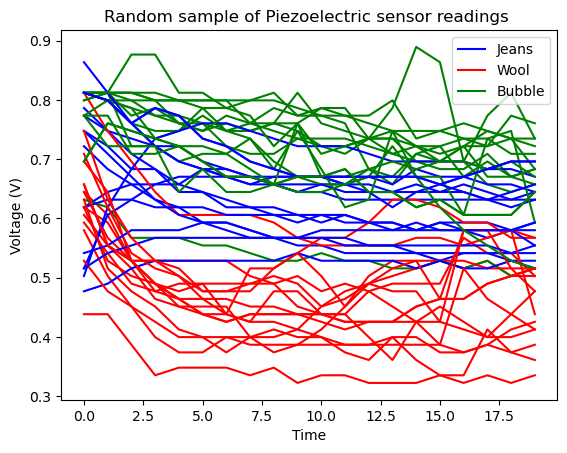

In [57]:
ind=np.random.random((15,))*100
ind=ind.astype(np.uint8)
for i in range(len(ind)):
    plt.plot(jeans[ind[i]][:,8],c="b")
    plt.plot(wool[ind[i]][:,8],c="r")
    plt.plot(bubble[ind[i]][:,8],c="g")

plt.plot(jeans[ind[i]][:,8],c="b",label="Jeans")
plt.plot(wool[ind[i]][:,8],c="r",label="Wool")
plt.plot(bubble[ind[i]][:,8],c="g",label="Bubble")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title("Random sample of Piezoelectric sensor readings ")
plt.savefig(path+"/images/randomSamplePiezo.pdf")
plt.show()

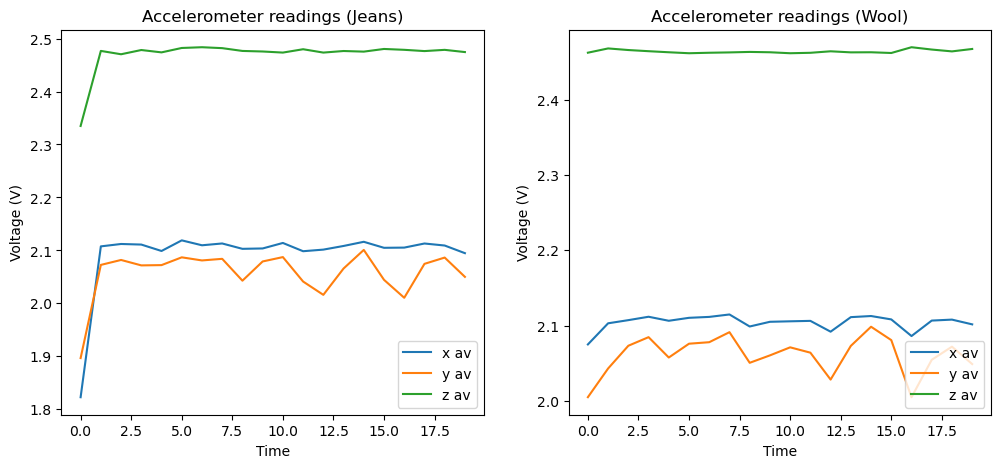

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

av=np.average(jeans,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[0].plot(av[:,9:12],label=["x av","y av","z av"])
axes[0].set_ylabel("Voltage (V)")
axes[0].set_xlabel("Time")
axes[0].set_title("Accelerometer readings (Jeans)")
axes[0].legend(loc="lower right")

av=np.average(wool,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[1].plot(av[:,9:12],label=["x av","y av","z av"])
axes[1].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time")
axes[1].set_title("Accelerometer readings (Wool)")
axes[1].legend(loc="lower right")

plt.show()

## plot sensor

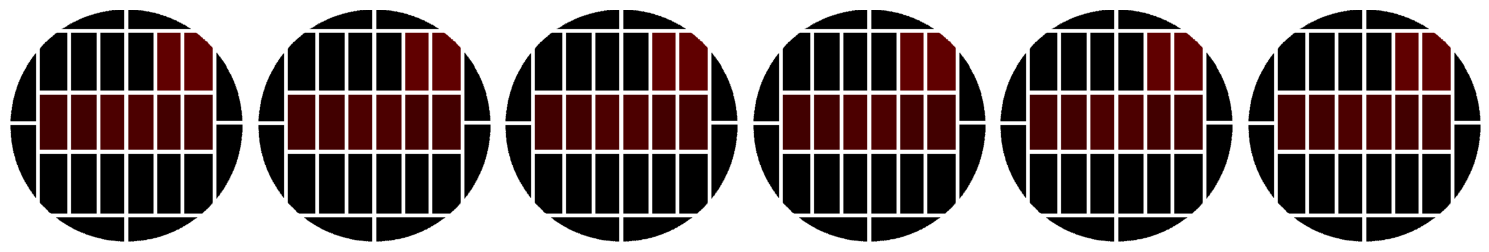

In [21]:
def visualise_pressues(channels):
    img = cv2.imread('/its/home/drs25/Pictures/pressTip/demonstrate.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dictionary={0:(0,189,230),1:(230,211,0),2:(230,0,227),3:(30,108,12),4:(230,0,0),6:(0,20,101),5:(121,36,116),6:(0,20,101),7:(229,112,112),8:(-1,-1,-1),9:(-1,-1,-1),10:(-1,-1,-1),11:(-1,-1,-1),12:(121,78,36),13:(0,45,230),14:(230,83,0),15:(112,229,122)}
    copied=np.zeros_like(img)
    mask = np.all(img == (0,0,0), axis=-1)
    copied[mask]=(255,255,255)
    for i in range(0,len(channels)):
        assert dictionary[i] in img or dictionary[i] == (-1,-1,-1), "Colour not in image:"+str(dictionary[i]) #check that the colour is in the correct format
        mask = np.all(img == dictionary[i], axis=-1)
        copied[mask]=(min(255,int(channels[i]*255)),0,0)
        #print((min(255,int(channels[i]*255)),0,0))
    mask = np.any((copied<110) & (copied>0), axis=-1)
    copied[mask,0]+=60
    copied[copied>255]=255
    copied[copied<0]=0

    return copied

av=np.average(X,axis=0)
fig, axes = plt.subplots(1, 6, figsize=(15, 10))
axes = axes.flatten()
for i in range(6):
    im=axes[i].imshow(visualise_pressues(av[i]),cmap="cividis")
    axes[i].axis("off")
plt.tight_layout()